# Visualiza emojis distribution per region

In [87]:
using Pkg
Pkg.activate(".")
#Pkg.add(["Plots", "CSV", "DataFrames", "SimilaritySearch", "TextSearch", "Formatting", "Latexify", "UMAP"])
using Plots, CSV, DataFrames, LinearAlgebra, TextSearch, Formatting, Latexify, UMAP

  Activating project at `~/Research/RegionalSpanish/notebooks`
   Resolving package versions...
   Installed ArnoldiMethod ────────── v0.1.0
   Installed StatsFuns ────────────── v0.9.15
   Installed NearestNeighborDescent ─ v0.3.5
   Installed UMAP ─────────────────── v0.1.9
   Installed LightGraphs ──────────── v1.3.5
   Installed Distributions ────────── v0.25.44
    Updating `~/Research/RegionalSpanish/notebooks/Project.toml`
  [c4f8c510] + UMAP v0.1.9
    Updating `~/Research/RegionalSpanish/notebooks/Manifest.toml`
  [ec485272] + ArnoldiMethod v0.1.0
  [7d9fca2a] + Arpack v0.5.0
  [b429d917] + DensityInterface v0.4.0
  [31c24e10] + Distributions v0.25.44
  [1a297f60] + FillArrays v0.12.7
  [6a86dc24] + FiniteDiff v2.10.0
  [d25df0c9] + Inflate v0.1.2
  [093fc24a] + LightGraphs v1.3.5
  [2fda8390] + LsqFit v0.12.1
  [d41bc354] + NLSolversBase v7.8.2
  [dd2c4c9e] + NearestNeighborDescent v0.3.5
  [87e2bd06] + OptimBase v2.0.2
  [90014a1f] + PDMats v0.11.5
  [1fd47b50] + QuadGK v2.4

In [46]:
E = CSV.read("../data/SpanishLang/messages-by-region/emojis.tsv.gz", DataFrame, delim='\t')
@info names(E)
cclist = unique(E.country_code)
sort!(cclist)
@info cclist

┌ Info: ["emoji", "country_code", "freq"]
└ @ Main In[46]:2
┌ Info: String3["AR", "BO", "BR", "CA", "CL", "CO", "CR", "CU", "DO", "EC", "ES", "FR", "GB", "GQ", "GT", "HN", "MX", "NI", "PA", "PE", "PR", "PY", "SV", "US", "UY", "VE"]
└ @ Main In[46]:5


In [20]:
voclist = Dict()

for g in groupby(E, :country_code)
    
    D = Dict{String7,Float64}()
    voclist[g.country_code[1]] = D
    for row in eachrow(g)
         D[row.emoji] = row.freq
    end
end


# top-20 most popular emojis by region

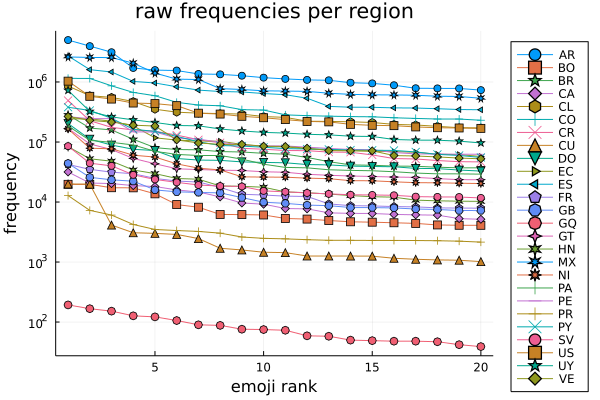

| region |   1 |   2 |   3 |   4 |   5 |   6 |   7 |   8 |   9 |  10 |  11 |  12 |  13 |  14 |  15 |  16 |  17 |  18 |  19 |  20 |
| ------:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:| ---:|
|     AR |   😂 |   😍 |   ❤ |   😭 |   👌 |   🎶 |   💕 |   👏 |   😘 |   🏻 |   ‍ |   😊 |   💪 |   😒 |   🙌 |   💔 |   🙏 |   ♥ |   🏼 |   😢 |
|     BO |   😂 |   ❤ |   🇧 |   🇴 |   😍 |   🏻 |   ‍ |   😭 |   💪 |   😊 |   👏 |   🏼 |   🇪 |   😘 |   👌 |   🤣 |   😎 |   🎤 |   💚 |   🙏 |
|     BR |   ❤ |   😍 |   😂 |   🏻 |   ‍ |   👏 |   🙏 |   🇷 |   🎶 |   🏼 |   🇧 |   😘 |   🏽 |   💙 |   😭 |   💕 |   🤦 |   🙌 |   ♂ |   ♀ |
|     CA |   😂 |   🇨 |   🏻 |   🇦 |   ❤ |   😍 |   ‍ |   🏼 |   😭 |   ♀ |   🤔 |   🤣 |   🙄 |   🤷 |   🏽 |   🙏 |   👏 |   😘 |   🇲 |   🇽 |
|     CL |   😂 |   🏻 |   ❤ |   😍 |   ‍ |   👏 |   🏼 |   🇨 |   🇱 |   💪 |   😊 |   🤔 |   🤣 |   😭 |   😘 |   🙄 |   🎶 |   👍 |   👌 |   😉 |
|     CO |   😍 |   😂 |   ❤ |   🎶 |   🏻 |   ‍ |   🙏 |   😭 |   👌 |   🏼 |   💕 |   👏 |   ♀ |   🇨 |   💪 |   🇴 |   🙄 |   😊 |   🤣 |   💙 |
|     CR |   😂 |   ❤ |   😍 |   😭 |   🏻 |   ‍ |   🏼 |   🙄 |   🙌 |   🏽 |   ♀ |   🤔 |   🇷 |   🇨 |   🤦 |   ♂ |   💪 |   😅 |   🎶 |   👌 |
|     CU |   🇺 |   🇨 |   ❤ |   🏻 |   😍 |   😂 |   ‍ |   🌴 |   🤣 |   🏼 |   😎 |   ☀ |   😘 |   🙏 |   😉 |   🏽 |   ♂ |   👌 |   👍 |   🌊 |
|     DO |   😂 |   😍 |   🏻 |   ‍ |   ❤ |   🎶 |   🇴 |   🇩 |   🤣 |   🙏 |   🏽 |   🔥 |   🙌 |   💪 |   😭 |   🏼 |   ♀ |   ♂ |   🤦 |   😘 |
|     EC |   😍 |   😂 |   ❤ |   🏻 |   ‍ |   🇪 |   🇨 |   😭 |   🏼 |   👏 |   😊 |   🎶 |   🙏 |   💪 |   😘 |   🤣 |   😎 |   💕 |   🎉 |   ♀ |
|     ES |   😂 |   😍 |   ❤ |   😘 |   🏻 |   👏 |   💪 |   😉 |   🏼 |   ‍ |   😊 |   😭 |   👌 |   🇪 |   💙 |   🤔 |   💕 |   🤣 |   🇸 |   🏽 |
|     FR |   ❤ |   😂 |   😘 |   😍 |   🇷 |   🇫 |   💋 |   🏻 |   😭 |   🏼 |   ‍ |   🎶 |   👏 |   🙏 |   💪 |   💕 |   ☀ |   👌 |   ✨ |   😊 |
|     GB |   😂 |   ❤ |   😍 |   🏻 |   🏼 |   ‍ |   🇧 |   🇬 |   😭 |   👏 |   😘 |   😉 |   🇪 |   🤣 |   😊 |   🏽 |   👌 |   🇸 |   💪 |   ♀ |
|     GQ |   😂 |   ❤ |   😍 |   🇬 |   🇶 |   🏡 |   👌 |   🌍 |   🙏 |   😘 |   😊 |   😩 |   😅 |   🏾 |   💪 |   💃 |   😭 |   👏 |   🍺 |   😒 |
|     GT |   😂 |   😍 |   ❤ |   🏻 |   😭 |   😊 |   🎶 |   ‍ |   🤣 |   🏼 |   👌 |   💕 |   🙄 |   😘 |   🇹 |   🇬 |   🤔 |   😉 |   😎 |   😁 |
|     HN |   😂 |   ❤ |   😍 |   🏻 |   😭 |   🤣 |   ‍ |   🇳 |   🇭 |   🎶 |   🙄 |   ♀ |   🏼 |   🙏 |   🏽 |   🤔 |   👏 |   🙌 |   👌 |   😅 |
|     MX |   😂 |   ❤ |   😍 |   🏻 |   😭 |   ‍ |   🏼 |   😘 |   🤔 |   💕 |   🙄 |   🙏 |   😎 |   👌 |   ♀ |   👏 |   🎶 |   🙌 |   😊 |   🏽 |
|     NI |   😂 |   😍 |   ❤ |   😭 |   🏻 |   🎶 |   ‍ |   🙄 |   💕 |   🇳 |   🇮 |   😒 |   👌 |   🏼 |   ♀ |   🤔 |   😅 |   💔 |   😏 |   🤣 |
|     PA |   😂 |   ❤ |   😍 |   🏻 |   ‍ |   😭 |   🇦 |   🇵 |   🤣 |   🏼 |   ♀ |   🔥 |   🙏 |   🤔 |   😩 |   🎶 |   🏽 |   🙄 |   👏 |   ♂ |
|     PE |   😂 |   ❤ |   😍 |   😭 |   🏻 |   🇪 |   🇵 |   😊 |   ‍ |   💪 |   💕 |   😘 |   🏼 |   🎶 |   🤔 |   🙏 |   👏 |   😉 |   😎 |   🙄 |
|     PR |   😂 |   ❤ |   🏻 |   🙄 |   🏼 |   😭 |   😍 |   🙌 |   😩 |   😒 |   💖 |   🏽 |   📺 |   🇷 |   💪 |   🙏 |   🇵 |   🔥 |   🤔 |   😘 |
|     PY |   😂 |   😍 |   ❤ |   😭 |   🏻 |   💪 |   🎶 |   ‍ |   👌 |   👏 |   🔴 |   🙌 |   🤣 |   🔵 |   😎 |   🏼 |   🎉 |   🤔 |   🙄 |   🇵 |
|     SV |   😂 |   😍 |   ❤ |   🤣 |   🏻 |   😭 |   😊 |   😎 |   🎶 |   👌 |   ‍ |   🙏 |   🇸 |   💕 |   👏 |   🇻 |   🤔 |   😘 |   😅 |   🏼 |
|     US |   😂 |   🏻 |   ❤ |   ‍ |   😍 |   🏼 |   😭 |   🏽 |   🙏 |   ♀ |   😘 |   🔥 |   🙄 |   🤣 |   🤔 |   🎶 |   🤦 |   ♂ |   🙌 |   😩 |
|     UY |   😂 |   😍 |   🏻 |   ❤ |   ‍ |   🏼 |   🙌 |   🎶 |   💪 |   👏 |   😭 |   ♀ |   🙄 |   👌 |   🤦 |   😒 |   🤔 |   🏽 |   🙏 |   💕 |
|     VE |   😍 |   😂 |   ❤ |   🇪 |   🇻 |   🙏 |   😘 |   ♥ |   🏻 |   😭 |   💕 |   🎶 |   👏 |   🔥 |   👍 |   💪 |   😎 |   😊 |   💙 |   🎉 |


In [77]:
k = 20
display("text/markdown", """# top-$k most popular emojis by region""")
plot()
table = Matrix{String}(undef, length(cclist) + 1, k+1)
header = ["region"]
for i in 1:k
    push!(header, string(i))
end

table[1, :] .= header
for (i, cc) in enumerate(cclist)
    voc = collect(voclist[cc])
    sort!(voc, by=p -> p[end], rev=true)
    resize!(voc, k)
    # display("text/markdown", "$cc: " * join(first.(voc), ", "))
    table[i+1, 1] = cc
    table[i+1, 2:end] .= first.(voc)
    plot!(last.(voc), label=cc, m=:auto)
    #display("text/markdown", "    freqs: " * join(format.(Int.(last.(voc)), autoscale=:metric, precision=1), ", "))
end
# display(latexify(table))

plot!(title="raw frequencies per region", yscale=:log10, ylabel="frequency", xlabel="emoji rank", legend=:outertopright) |> display
display("text/markdown", latexify(table, latex=false, env=:mdtable))

In [86]:
for (cc, voc) in voclist
    normalize!(voc)
end

n = length(cclist)
A = Matrix{Float64}(undef, n, n)

dist = NormalizedCosineDistance()
@time for (i, cc) in enumerate(cclist)
    u = voclist[cc]
    A[i, i] = 0.0
    for j in i+1:n
        v = voclist[cclist[j]]
        A[j, i] = A[i, j] = evaluate(dist, u, v)        
    end
end

  0.046009 seconds (31.37 k allocations: 1.653 MiB, 71.79% compilation time)


In [128]:
min_dist = 0.03
n_neighbors = 3
metric = :precomputed

X = umap(A; n_neighbors, metric, min_dist)
C = umap(A, 3; n_neighbors, metric, min_dist)
#C .= C .+ 5

for i in (1, 2, 3)
    min_, max_ = extrema(C[i, :])
    # @info i => (min_, max_)
    for j in 1:size(C, 2)
        C[i, j] = (C[i, j] - min_) / (max_ - min_)
    end
end

C = [RGB(c...) for c in eachcol(C)]

# UMAP visualization of vocabularies

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 3NN and cosine distance with raw vocabularies.



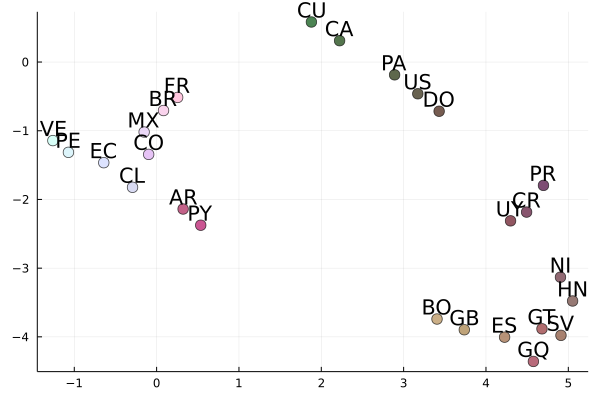

In [135]:
scatter(X[1, :], X[2, :], c=C, label="", series_annotations=text.(cclist, :bottom), ms=6, ma=0.7)